# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

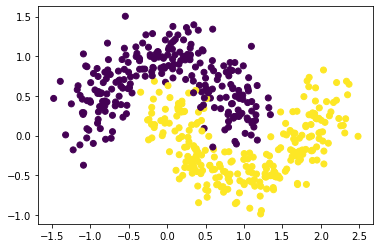

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

Logistic regression:
f1 score:  0.8619861986198618


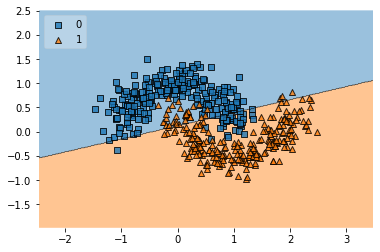

SVM:
f1 score:  0.8619861986198618


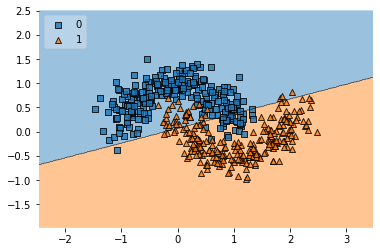

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(solver='saga', C=13, random_state=42)
svm = SVC(kernel='linear', C=13, tol=1e-3, random_state=42)

def f1_calc(X, y, estimator):
    clf = estimator.fit(X, y)
    y_pred = clf.predict(X)
    print("f1 score: ", f1_score(y, y_pred, average='macro'))

def plot_decisions(X, y, estimator):
    clf = estimator.fit(X,y)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.show()
    
print("Logistic regression:")
f1_calc(moons_points, moons_labels, lr)
plot_decisions(moons_points, moons_labels, lr)

print("SVM:")
f1_calc(moons_points, moons_labels, svm)
plot_decisions(moons_points, moons_labels, svm)

Quality of 2 approaches are the same, because SVM with linear kernel and logistic regression give quite similar results on such small datasets without big outliers. The quality level is not high because of non-linear edge between sets. Plots are similar.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

SVM, poly:
f1 score:  0.9859994959818553


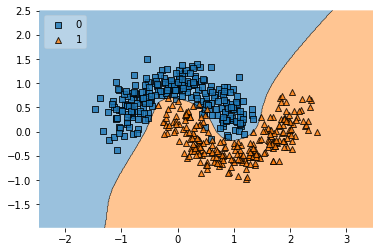

SVM, rbf:
f1 score:  0.9859994959818553


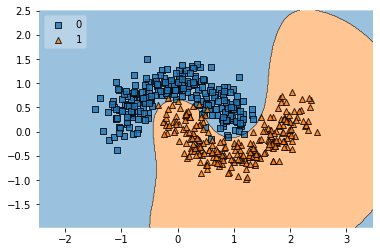

SVM, sigmoid:
f1 score:  0.7880803338549818


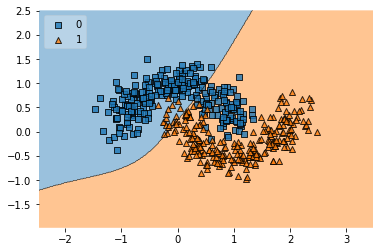

In [4]:
svm_poly = SVC(kernel='poly', C=9.48, degree=9, coef0=0.55, tol=1e-3, random_state=42)
svm_rbf = SVC(kernel='rbf', C=20, tol=1e-2, random_state=42)
svm_sigm = SVC(kernel='sigmoid', C=0.01, coef0=0.7, tol=1e-3, random_state=42)

print("SVM, poly:")
f1_calc(moons_points, moons_labels, svm_poly)
plot_decisions(moons_points, moons_labels, svm_poly)
print("SVM, rbf:")
f1_calc(moons_points, moons_labels, svm_rbf)
plot_decisions(moons_points, moons_labels, svm_rbf)
print("SVM, sigmoid:")
f1_calc(moons_points, moons_labels, svm_sigm)
plot_decisions(moons_points, moons_labels, svm_sigm)

Classification quality increased on poly and rbf kernels, but dropped on sigmoid kernel. For poly and rbf kernels decision border almost fully separate sets, unlike sigmoid kernel, which separated set worse than linear kernel. We may notice that border for rbf kernel is closed, which doesn't look like real decision border. For polynomial kernel we may use different degrees, according to shape of our set we should take odd number as a degree, I've chosen 9 because it showed best results in f1 score

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Logistic regression with new features:
f1 score:  0.9839997439959038


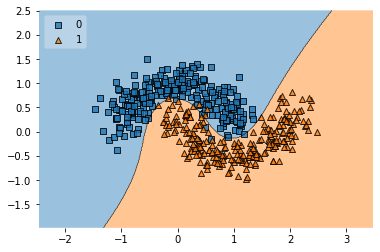

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

lr = LogisticRegression(solver='saga', C=90, random_state=42, max_iter=2300)
poly = PolynomialFeatures(degree=3)

pipe = Pipeline(steps=[('poly', poly),
                       ('lr', lr)])

print("Logistic regression with new features:")
f1_calc(moons_points, moons_labels, pipe)
plot_decisions(moons_points, moons_labels, pipe)

New solution with PolynomialFeatures has border similar to polynomial and rbf kernels in SVM and its quality differs from them less than on 0.01%. I used degree 3, which fits better, than other degrees, also it is an odd number like in previous item 1.2.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

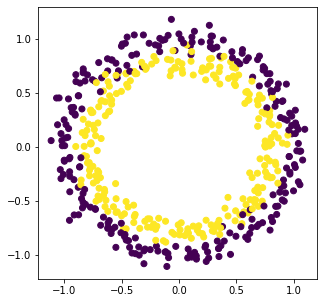

In [6]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

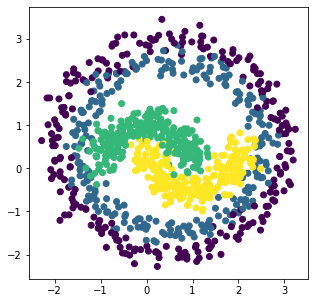

In [7]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [8]:
def plot_decisions(X, y, estimator):
    clf = estimator.fit(X,y)
    fig = plt.figure(figsize=(10, 10))
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.show()

Logistic regression + PolynomialFeatures:
f1 score:  0.9380370906403181


/home/peter/p/tf-demo/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


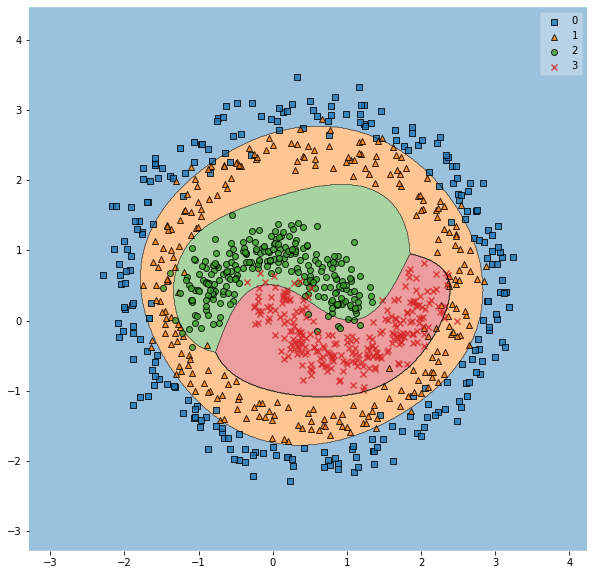

In [9]:
lr = LogisticRegression(solver='saga', C=5, random_state=42, max_iter=4700)
poly = PolynomialFeatures(degree=4)

pipe = Pipeline(steps=[('poly', poly),
                       ('lr', lr)])

print("Logistic regression + PolynomialFeatures:")
f1_calc(points, labels, pipe)
plot_decisions(points, labels, pipe)

f1 score:  0.9440793422861584


/home/peter/p/tf-demo/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


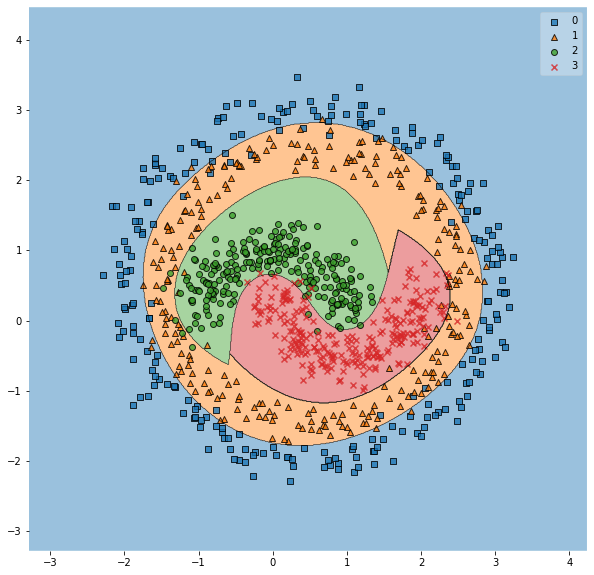

In [10]:
svm_rbf = SVC(kernel='poly', C=90, degree=4, coef0=0.4, tol=1e-3, random_state=42)

f1_calc(points, labels, svm_rbf)
plot_decisions(points, labels, svm_rbf)

Last dataset is more complicated than previous, so quality of classification is lower. Logistic regression with PolynomialFeatures has quality almost like SVM with polynomial kernel, but needs a lot more iterations. Also on this dataset 4 degrees in PolynomialFeatures and in SVM with polynomial kernel give the best result.